In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Set visual style
sns.set_style("whitegrid")

# Load the dataset
df = pd.read_csv(r"D:\NTI Machine Learning\project\EMPLOYEE_TURNOVER.csv")
print("Dataset loaded successfully. Rows:", df.shape[0])


Dataset loaded successfully. Rows: 14999


In [2]:
# Show sample records
print("Sample of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Sample of the dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0  

C:\Users\Pro\AppData\Local\Temp\ipykernel_9368\1959707304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quit', data=df, palette='Set2')


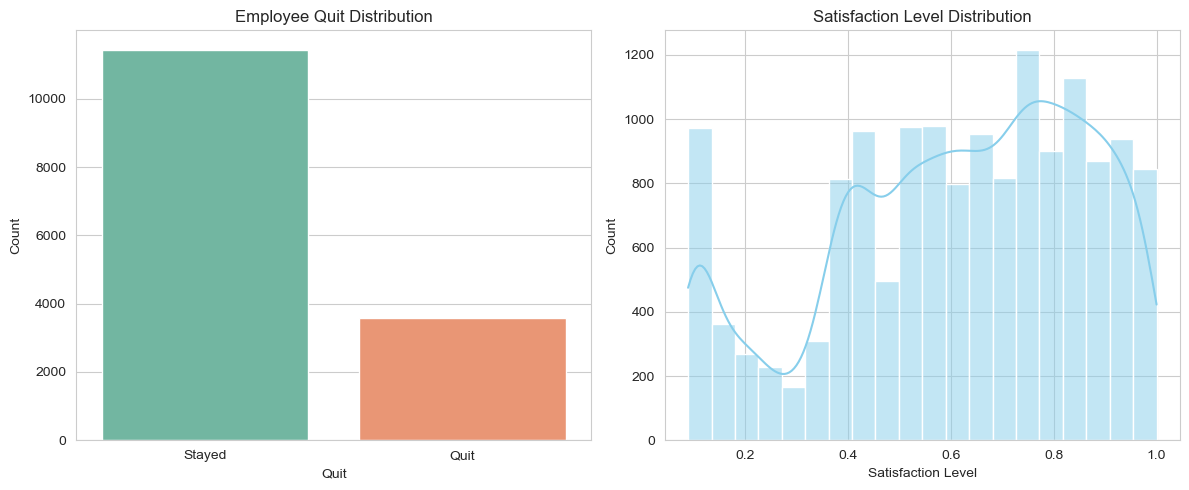

In [3]:
plt.figure(figsize=(12, 5))

# Quit distribution
plt.subplot(1, 2, 1)
sns.countplot(x='quit', data=df, palette='Set2')
plt.title('Employee Quit Distribution')
plt.xlabel('Quit')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stayed', 'Quit'])

# Satisfaction level distribution
plt.subplot(1, 2, 2)
sns.histplot(df['satisfaction_level'], bins=20, kde=True, color='skyblue')
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\Pro\AppData\Local\Temp\ipykernel_9368\2724208122.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='number_project', data=df, palette='viridis')


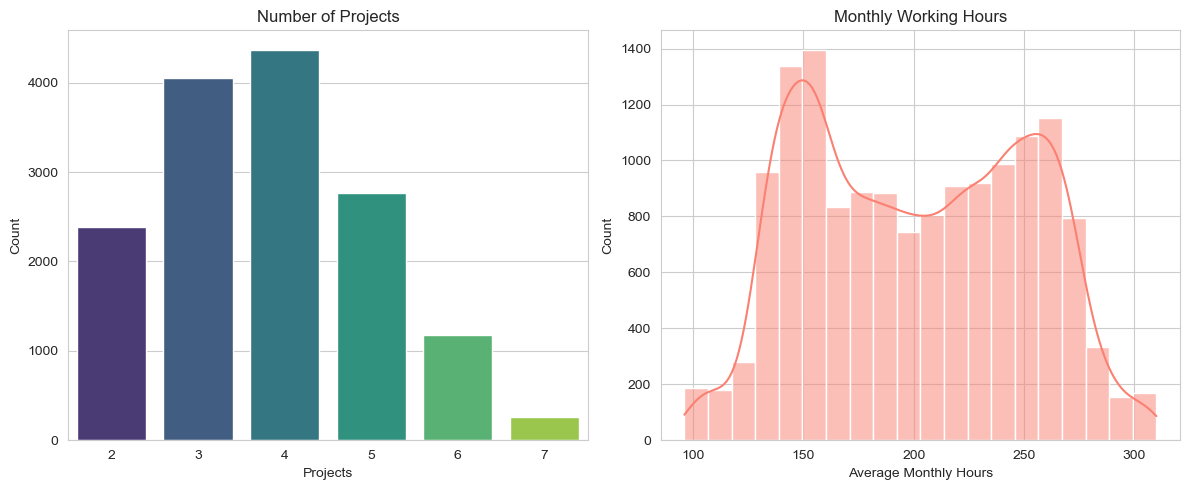

In [4]:
plt.figure(figsize=(12, 5))

# Number of projects
plt.subplot(1, 2, 1)
sns.countplot(x='number_project', data=df, palette='viridis')
plt.title('Number of Projects')
plt.xlabel('Projects')
plt.ylabel('Count')

# Monthly working hours
plt.subplot(1, 2, 2)
sns.histplot(df['average_montly_hours'], bins=20, kde=True, color='salmon')
plt.title('Monthly Working Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


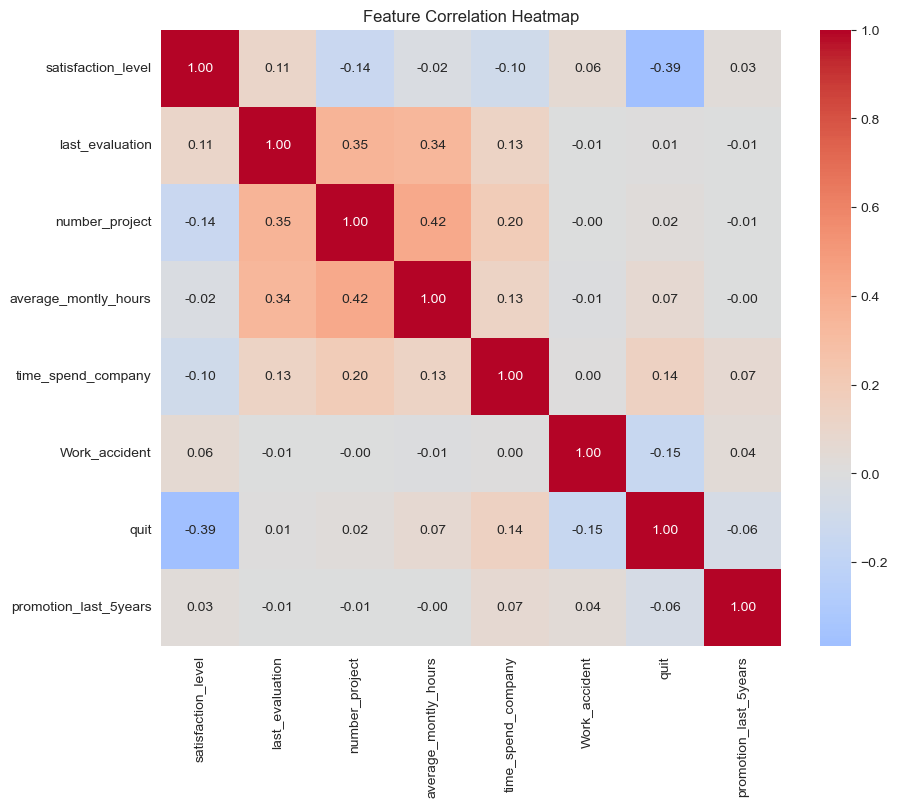

In [5]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [6]:
# Encode categorical variables
label_encoders = {}
for col in ['department', 'salary']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop('quit', axis=1)
y = df['quit']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Data split completed.")
print(f"Training size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


 Data split completed.
Training size: 11999, Test size: 3000


In [7]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


C:\Users\Pro\AppData\Local\Temp\ipykernel_9368\2673602191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='pastel')


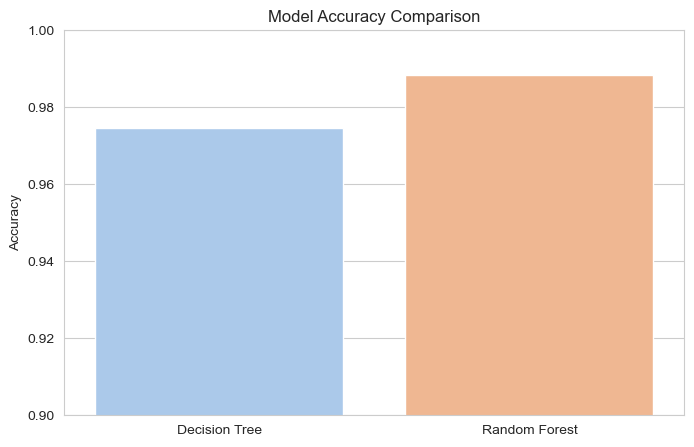

Decision Tree Accuracy: 0.9747
Random Forest Accuracy: 0.9883


In [8]:
plt.figure(figsize=(8, 5))
models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

sns.barplot(x=models, y=accuracies, palette='pastel')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

print(f"Decision Tree Accuracy: {accuracies[0]:.4f}")
print(f"Random Forest Accuracy: {accuracies[1]:.4f}")


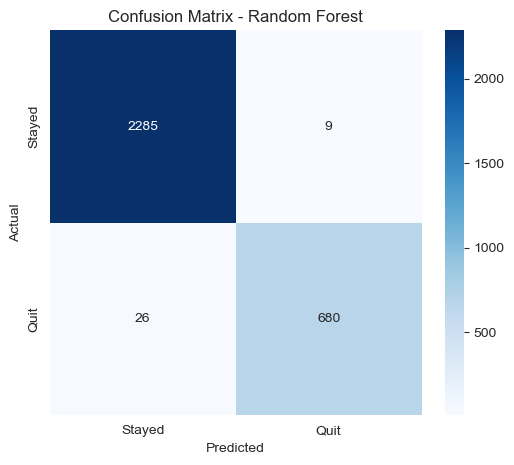

In [9]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Quit'],
            yticklabels=['Stayed', 'Quit'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


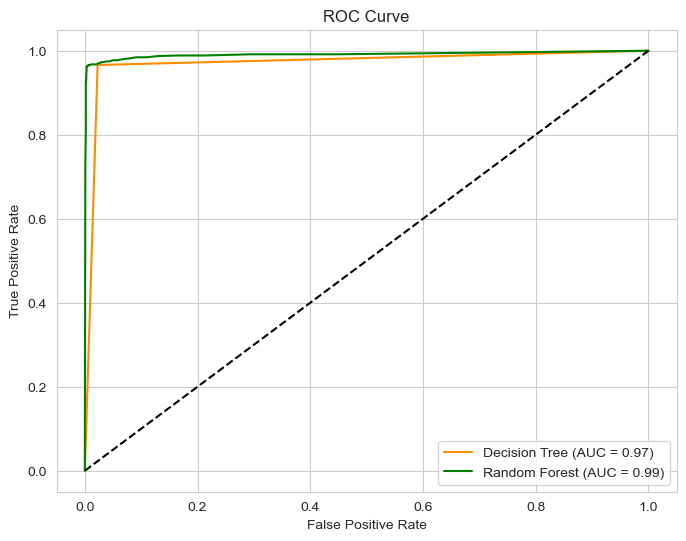

In [10]:
plt.figure(figsize=(8, 6))

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='darkorange')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')

# Baseline
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


C:\Users\Pro\AppData\Local\Temp\ipykernel_9368\914077880.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='rocket')


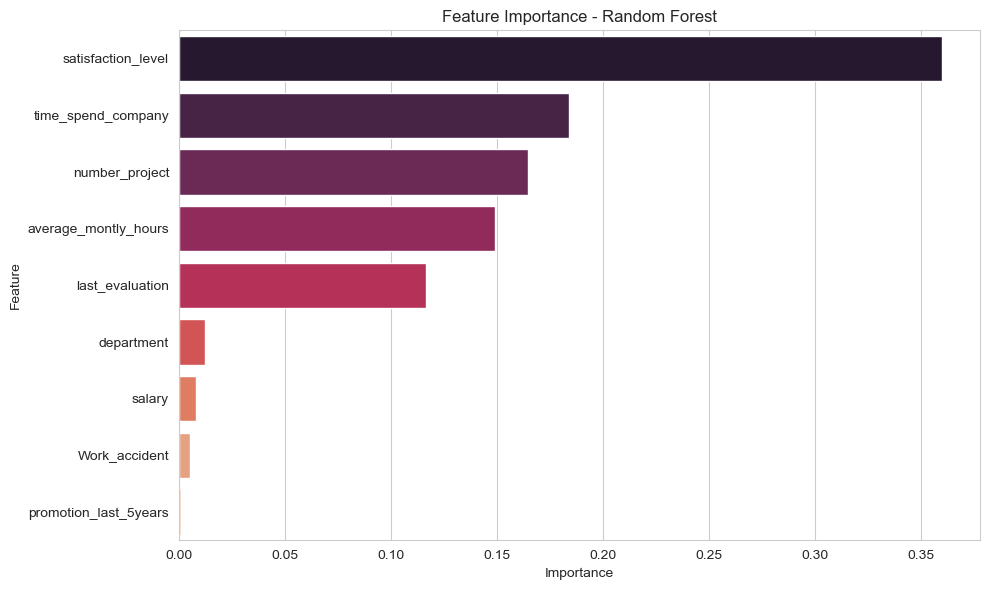

Top 3 Most Important Features:
1. satisfaction_level (Importance: 0.360)
5. time_spend_company (Importance: 0.184)
3. number_project (Importance: 0.165)


In [11]:
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='rocket')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

print("Top 3 Most Important Features:")
for i, row in feature_importance.head(3).iterrows():
    print(f"{i+1}. {row['Feature']} (Importance: {row['Importance']:.3f})")


In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params,
                       cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best accuracy (CV):", grid_dt.best_score_)

# Evaluate on test set
best_dt = grid_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print(classification_report(y_test, y_pred_best_dt))


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy (CV): 0.9794985757954704
Test Accuracy: 0.9793333333333333
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2294
           1       0.97      0.94      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [13]:
# Define parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params,
                       cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best accuracy (CV):", grid_rf.best_score_)

# Evaluate on test set
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy (CV): 0.9909993747394749
Test Accuracy: 0.9883333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



C:\Users\Pro\AppData\Local\Temp\ipykernel_9368\103956867.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='pastel')


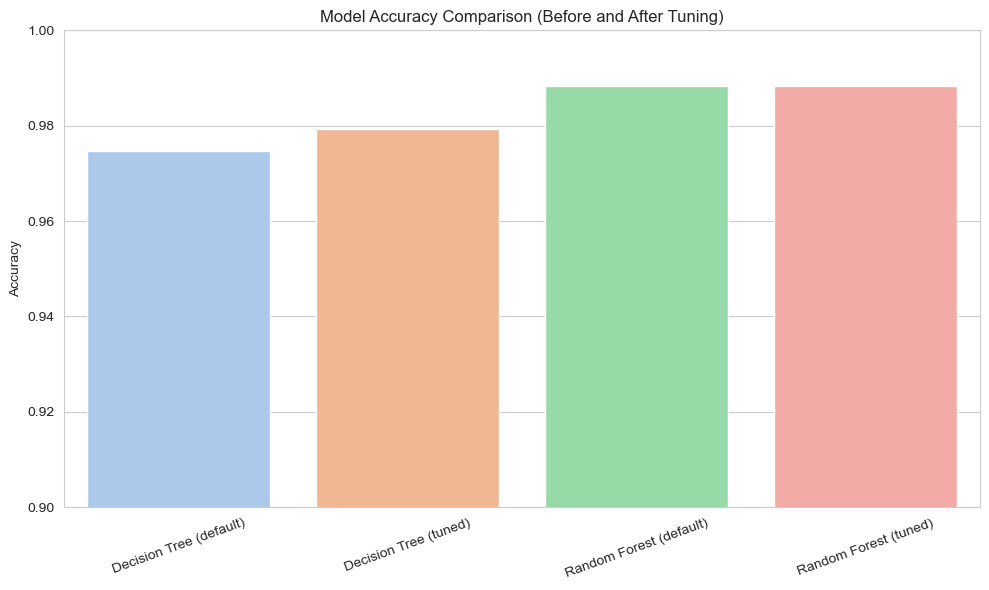

In [14]:
# Collect all accuracy scores
model_names = [
    "Decision Tree (default)",
    "Decision Tree (tuned)",
    "Random Forest (default)",
    "Random Forest (tuned)"
]

accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_best_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_best_rf)
]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='pastel')
plt.ylim(0.9, 1.0)
plt.title("Model Accuracy Comparison (Before and After Tuning)")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
